# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [61]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [62]:
data = pd.read_csv('weight-height.csv')
data.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [63]:
#data = pd.read_csv('weight-height.csv')
male_df =  data[data['Gender'] == 'Male'].copy()
female_df =  data[data['Gender'] == 'Female'].copy()

print(f'Male Height mean: {male_df["Height"].mean()}')
print(f'Male Height sd: {male_df["Height"].std()}')
print(f'Male Weight mean: {male_df["Weight"].mean()}')
print(f'Male Weight sd: {male_df["Weight"].std()}')
print(f'Feamle Height mean: {female_df["Height"].mean()}')
print(f'Feamle Height sd: {female_df["Height"].std()}')      
print(f'Feamle Weight mean: {female_df["Weight"].mean()}')      
print(f'Feamle Weight sd: {female_df["Weight"].std()}')
      
      
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638
Feamle Height mean: 63.70877360342507
Feamle Height sd: 2.696284015765054
Feamle Weight mean: 135.86009300746835
Feamle Weight sd: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

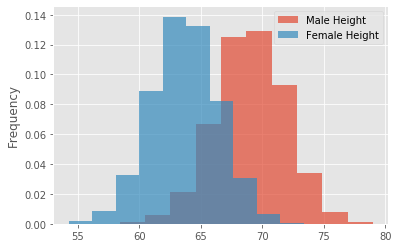

In [64]:
# Your code here
plt.hist(male_df['Height'], density = True, bins = 10, label = 'Male Height', alpha = 0.7)
plt.hist(female_df['Height'], density = True, bins = 10, label = 'Female Height', alpha = 0.7)
plt.ylabel('Frequency')
plt.legend();

In [65]:
# Record your observations - are these inline with your personal observations?
# Yes. Women's average height is around 63 and for males it is around 70. 

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [74]:
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
s

array([ 0.04412275, -0.03308702,  0.24307712, -0.02520921,  0.01096098,
        0.15824811, -0.09092324, -0.05916367,  0.01876032, -0.032987  ,
       -0.11927646, -0.02048765, -0.03588289,  0.06034716, -0.16647885,
       -0.0700179 ,  0.1151391 ,  0.1857331 , -0.15111796,  0.06448475,
       -0.09806079, -0.08568532, -0.08718792, -0.04225079,  0.09964398,
        0.07124213,  0.00591442, -0.03633109,  0.00032888, -0.01059304,
        0.07930533, -0.06315716, -0.00061949, -0.01010676, -0.00523082,
        0.02492177,  0.01976601,  0.13348486, -0.00868756,  0.15615323,
       -0.0305853 , -0.04777314,  0.01007382,  0.03554385,  0.02696124,
        0.12919634,  0.1139343 ,  0.04944404, -0.03363363, -0.01006143,
        0.1413398 ,  0.02212541, -0.13107731, -0.06895652, -0.05775132,
        0.11522048, -0.0107164 ,  0.22601068,  0.06566195,  0.01248068,
       -0.04357039,  0.09721793, -0.02407111, -0.08241235,  0.05681327,
        0.00127583,  0.11890607, -0.00735933, -0.2859688 ,  0.07

In [67]:
my_hist = np.histogram(s, density = True)

In [68]:
my_hist[0]

array([0.18901951, 0.18901951, 0.75607804, 1.51215608, 5.10352679,
       4.15842923, 3.02431217, 2.26823413, 1.13411706, 0.56705853])

In [69]:
my_hist[1]

array([-0.2859688 , -0.23306421, -0.18015961, -0.12725502, -0.07435043,
       -0.02144584,  0.03145875,  0.08436334,  0.13726794,  0.19017253,
        0.24307712])

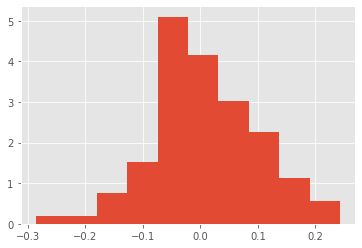

In [70]:

plt.hist(s, density = True);

In [81]:
def density(my_array):
    
    my_hist = np.histogram(my_array, density = True)
    density_x = []
    for counter, x in enumerate(my_hist[1]):
        if counter + 1 < len(my_hist[1]):
            density_x.append((x + my_hist[1][counter + 1]) / 2)
              
    return density_x, my_hist[0]

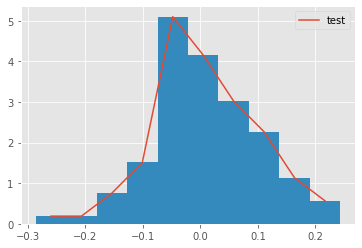

In [84]:
# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend();
plt.hist(s, density = True);

## Add overlapping density plots to the histograms plotted earlier

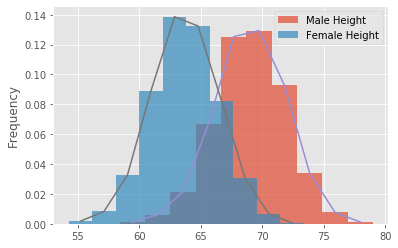

In [88]:
# Your code here 
plt.hist(male_df['Height'], density = True, bins = 10, label = 'Male Height', alpha = 0.7)
plt.hist(female_df['Height'], density = True, bins = 10, label = 'Female Height', alpha = 0.7)
x_men, y_men = density(male_df['Height'])
plt.plot(x_men, y_men)
x_women, y_women = density(female_df['Height'])
plt.plot(x_women, y_women)
plt.ylabel('Frequency')
plt.legend();

## Repeat the above exercise for male and female weights

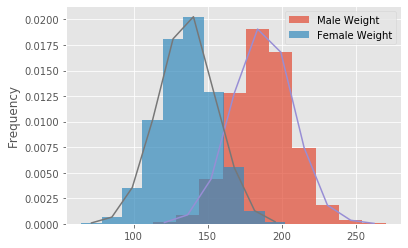

In [89]:
# Your code here 
plt.hist(male_df['Weight'], density = True, bins = 10, label = 'Male Weight', alpha = 0.7)
plt.hist(female_df['Weight'], density = True, bins = 10, label = 'Female Weight', alpha = 0.7)
x_men, y_men = density(male_df['Weight'])
plt.plot(x_men, y_men)
x_women, y_women = density(female_df['Weight'])
plt.plot(x_women, y_women)
plt.ylabel('Frequency')
plt.legend();

## Write your observations in the cell below

In [ ]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

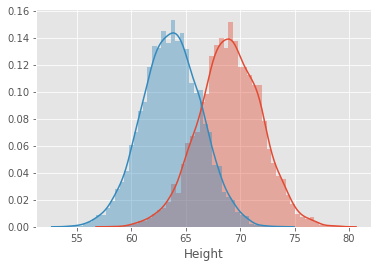

In [92]:
# Code for heights here
import seaborn as sns
sns.distplot(male_df['Height'])
sns.distplot(female_df['Height'])

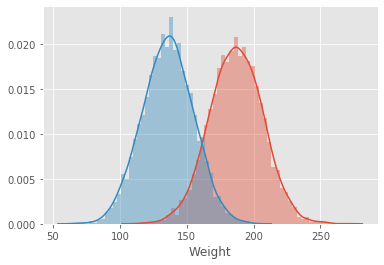

In [93]:
# Code for weights here
sns.distplot(male_df['Weight'])
sns.distplot(female_df['Weight'])

In [ ]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.